**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

## ATAC Peaks

In [38]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat = read_tsv(fpath, col_names = cnames)
dat = dat %>% dplyr::mutate(Peak = paste(Chrom, Start, End, sep = "_"))

dat_peak_total = dat
print(dim(dat))
head(dat)

Rows: 247520 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Chrom
dbl (2): Start, End

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 247520      4


Chrom,Start,End,Peak
<chr>,<dbl>,<dbl>,<chr>
chr1,10015,10442,chr1_10015_10442
chr1,14253,14645,chr1_14253_14645
chr1,16015,16477,chr1_16015_16477
chr1,17237,17772,chr1_17237_17772
chr1,28903,29613,chr1_28903_29613
chr1,30803,31072,chr1_30803_31072


### Enhancer

In [15]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.enhancer_junke_peak_merge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_annot_enhancer = dat
print(dim(dat))
head(dat)

Rows: 29012 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Peak, Name, Assay, Annotate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 29012     4


Peak,Name,Assay,Annotate
<chr>,<chr>,<chr>,<chr>
chr10_100009096_100010466,Enhancer,WSTARR,"chr10_100009900_100009950,chr10_100010000_100010030"
chr10_100185017_100187275,Enhancer,WSTARR,chr10_100185860_100186300
chr10_100228452_100230090,Enhancer,ASTARR,chr10_100229600_100229770
chr10_100267066_100268374,Enhancer,"ASTARR,WSTARR","chr10_100267660_100267770,chr10_100267670_100267780"
chr10_100285974_100287341,Enhancer,WSTARR,"chr10_100286470_100286500,chr10_100286550_100286830"
chr10_100346328_100347693,Enhancer,WSTARR,chr10_100346760_100347200


### Promoter

In [16]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "peak.summary.gencode_v24_tss.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_annot_promoter = dat
print(dim(dat))
head(dat)

Rows: 19001 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Peak, Name, Annotate
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 19001     4


Peak,Name,Count,Annotate
<chr>,<chr>,<dbl>,<chr>
chr10_100009096_100010466,TSS,1,ENSG00000107554.17
chr10_100185017_100187275,TSS,1,ENSG00000107566.14
chr10_100228452_100230090,TSS,2,"ENSG00000213341.11,ENSG00000227492.2"
chr10_100267066_100268374,TSS,1,ENSG00000095485.18
chr10_100285974_100287341,TSS,1,ENSG00000196072.12
chr10_100346328_100347693,TSS,2,"ENSG00000231188.1,ENSG00000099194.6"


### Hi-C Loop

In [17]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.hic_intact.edge.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath)

dat_peak_loop = dat
print(dim(dat))
head(dat)

Rows: 76853 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Peak_A, Peak_B
dbl (1): Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 76853     3


Peak_A,Peak_B,Count
<chr>,<chr>,<dbl>
chr10_100338359_100339077,chr10_100433434_100434444,1
chr10_100342247_100342824,chr10_100433434_100434444,1
chr10_100342247_100342824,chr10_100508470_100509309,1
chr10_100342247_100342824,chr10_100871690_100872646,1
chr10_100342247_100342824,chr10_100878006_100879519,1
chr10_100342247_100342824,chr10_100879867_100880309,1


## Composition

In [39]:
dat = dat_peak_annot_enhancer
dat = dat %>% dplyr::mutate(Enhancer = "E") %>% dplyr::select(Peak, Enhancer) %>% distinct
dat_peak_enhancer = dat

dat = dat_peak_annot_promoter
dat = dat %>% dplyr::mutate(Promoter = "P") %>% dplyr::select(Peak, Promoter) %>% distinct
dat_peak_promoter = dat

In [40]:
print(nrow(dat_peak_enhancer))
print(nrow(dat_peak_promoter))
print(length(intersect(dat_peak_enhancer$Peak, dat_peak_promoter$Peak)))

[1] 29012
[1] 19001
[1] 8750


In [86]:
dat = dat_peak_total
dat = dat %>% 
    dplyr::left_join(dat_peak_enhancer, by = "Peak") %>%
    dplyr::left_join(dat_peak_promoter, by = "Peak") %>%
    replace(is.na(.), "")

dat = dat %>% 
    dplyr::mutate(Type = paste0(Enhancer, Promoter)) %>%
    dplyr::mutate(Type = ifelse(Type == "", "None", Type)) %>%
    dplyr::group_by(Type) %>%
    dplyr::summarize(Count = n())

dat_peak_type = dat
head(dat)

Type,Count
<chr>,<int>
E,20262
EP,8750
None,208257
P,10251


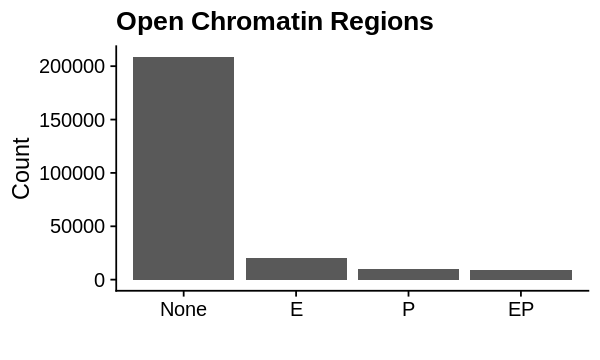

In [87]:
dat = dat_peak_type
dat$Type = factor(dat$Type, levels=c("None", "E", "P", "EP"))

gpt = ggplot(dat, aes(x=Type, y=Count)) + 
    geom_col() + 
    labs(x = "", title = "Open Chromatin Regions") +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

## E-P links

In [93]:
dat = dat_peak_loop
peaks = unique(c(dat$Peak_A, dat$Peak_B))

cat("#Edge:", nrow(dat), "\n")
cat("#Node:", length(peaks), "\n")

#Edge: 76853 
#Node: 50890 


In [74]:
dat = dat_peak_loop
dat = left_join(dat, dat_peak_enhancer, by = c("Peak_A" = "Peak"))
dat = left_join(dat, dat_peak_promoter, by = c("Peak_B" = "Peak"))
dat = dat %>% 
    replace(is.na(.), "X") %>% 
    dplyr::rowwise() %>% 
    dplyr::mutate(Edge = paste(sort(c(Enhancer, Promoter)), collapse = "-"))

dat_loop_EP = dat
print(dim(dat))
head(dat)

[1] 76853     6


Peak_A,Peak_B,Count,Enhancer,Promoter,Edge
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr10_100338359_100339077,chr10_100433434_100434444,1,X,X,X-X
chr10_100342247_100342824,chr10_100433434_100434444,1,X,X,X-X
chr10_100342247_100342824,chr10_100508470_100509309,1,X,X,X-X
chr10_100342247_100342824,chr10_100871690_100872646,1,X,X,X-X
chr10_100342247_100342824,chr10_100878006_100879519,1,X,X,X-X
chr10_100342247_100342824,chr10_100879867_100880309,1,X,X,X-X


In [75]:
table(dat_loop_EP$Edge)


  E-P   E-X   P-X   X-X 
 5130 14231  7968 49524 

In [76]:
dat = dat_peak_loop
dat = left_join(dat, dat_peak_enhancer, by = c("Peak_B" = "Peak"))
dat = left_join(dat, dat_peak_promoter, by = c("Peak_A" = "Peak"))
dat = dat %>% 
    replace(is.na(.), "X") %>% 
    dplyr::rowwise() %>% 
    dplyr::mutate(Edge = paste(sort(c(Enhancer, Promoter)), collapse = "-"))

dat_loop_PE = dat
print(dim(dat))
head(dat)

[1] 76853     6


Peak_A,Peak_B,Count,Enhancer,Promoter,Edge
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr10_100338359_100339077,chr10_100433434_100434444,1,X,X,X-X
chr10_100342247_100342824,chr10_100433434_100434444,1,X,X,X-X
chr10_100342247_100342824,chr10_100508470_100509309,1,X,X,X-X
chr10_100342247_100342824,chr10_100871690_100872646,1,X,X,X-X
chr10_100342247_100342824,chr10_100878006_100879519,1,X,X,X-X
chr10_100342247_100342824,chr10_100879867_100880309,1,X,X,X-X


In [77]:
table(dat_loop_PE$Edge)


  E-P   E-X   P-X   X-X 
 5128 14288  8219 49218 

In [89]:
dat = bind_rows(dat_loop_EP, dat_loop_PE)
dat = dat %>% 
    dplyr::select(Peak_A, Peak_B, Edge) %>% 
    dplyr::distinct() %>%
    dplyr::group_by(Edge) %>%
    dplyr::summarize(Count = n())

dat_loop_type = dat
print(dim(dat))
head(dat)

[1] 4 2


Edge,Count
<chr>,<int>
E-P,7953
E-X,26449
P-X,15871
X-X,59107


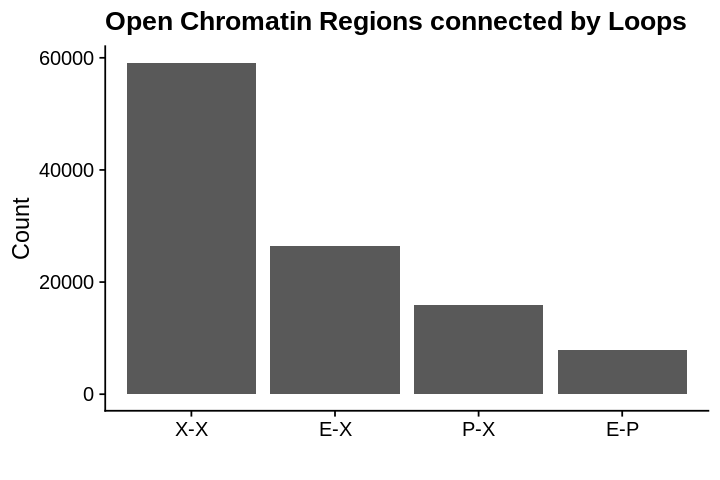

In [100]:
dat = dat_loop_type
dat$Edge = factor(dat$Edge, levels=c("X-X", "E-X", "P-X", "E-P"))

gpt = ggplot(dat, aes(x=Edge, y=Count)) + 
    geom_col() + 
    labs(x = "", title = "Open Chromatin Regions connected by Loops") +
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=6)
print(gpt)